In [8]:
import numpy as np
from numpy import ma
import pykalman as pk
import os
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import sys
sys.path.append("..")
from data import load_openl3_time_series as load_data


In [5]:
#choosing a sensor with a reasonable, readable amount of data
DATA_LOC = '/beegfs/work/sonyc/features/openl3/2017'
BEST_SENSOR_LOC = os.path.join(DATA_LOC, 'sonycnode-b827ebefb215.sonyc_features_openl3.h5')

In [6]:
#loading data for processing
data, mask = load_data(BEST_SENSOR_LOC)

../data.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(hdf5_path) as f:


In [16]:
data.shape

(6735, 512)

In [10]:
pca_l3 = PCA(n_components=5)
pca_l3.fit(data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
data_pca = pca_l3.transform(data)

In [ ]:
#time testing
times = []
n_components = [2**k for k in range(10)]
for n in n_components:
    print("Testing {} PCA Component(s)".format(n))
    tstart = time.time()
    pca_fit = PCA(n_components=n)
    pca_fit.fit(data)
    data_fit = pca_fit.transform(data)
    kf = pk.KalmanFilter(n_dim_state=5, n_dim_obs=data_fit.shape[1])
    kf.em(data_fit, n_iter=5)
    tend = time.time()
    times.append(tend-tstart)

Testing 1 PCA Component(s)
Testing 2 PCA Component(s)
Testing 4 PCA Component(s)
Testing 8 PCA Component(s)
Testing 16 PCA Component(s)
Testing 32 PCA Component(s)
Testing 64 PCA Component(s)
Testing 128 PCA Component(s)
Testing 256 PCA Component(s)


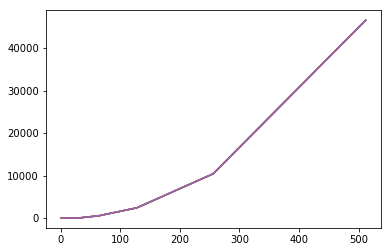

In [24]:
plt.plot(n_components, times)
plt.show()

In [25]:
#testing the training function w/ pca
!python ../train_pykalman.py --output_path . --data_range 100 --model_name "pca_test" --n_pca 8

Loading data from sonycnode-b827ebefb215.sonyc_features_openl3.h5
/home/ci411/sonyc-kalman/sonyc_kalman/data.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(hdf5_path) as f:
Training Kalman Filter: Sensor: sonycnode-b827ebefb215.sonyc_features_openl3.h5,	 N_Iterations: 5,	 Latent Space Dim2
Training complete, saving result to .


In [28]:
print(os.path.join(params.output_path, model_name))

./pca_test


In [29]:
with open(os.path.join('.','pca_test.pkl'), 'rb') as fd:
    pykal_load = pickle.load(fd)

In [30]:
with open(os.path.join('.','pca_test_pca.pkl'), 'rb') as fd:
    pca_load = pickle.load(fd)

In [31]:
pykal_load

In [32]:
pca_load

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)